# Анализ рыночной стоимости объектов недвижимости

## 1 Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


###### Описание данных (столбцы содержат следующую информацию):

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах (м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении


In [3]:
data.info()
print()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

###### Вывод

    1) Таблица данных содержит 22 столбца и 23699 строк.
    2) Больше половины колонок содержат пропуски.
    3) Часть колонок имеют тип данных не соответствующий действительности.
    4) Ошибок в названии колонок нет, названия отображены корректно.

## 2 Предобработка данных

### 2.1 Поиск пропусков в столбцах.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В общем датасете присутствует большое количество пропусков. Больше половины столбцов имеет пропуски.

Пропуски в данных могли появиться по разным причинам. Пользователь мог не указать какие-либо сведения или оставить пропуски специально расчитывая на их автозаполнение. Кроме того, пропуски могли быть сделаны продавцами недвижимости намеренно, считая их не имеющими особой важности, либо как способ скрыть отсутсвие того или иного параметра (например столбцы 'is_apartment', 'parks_nearest', 'ponds_nearest'). Также могут иметь место технические ошибки, например система сбора информации могла выдать ошибку.

Пропуски в столбце 'balcony' скорее всего говорят об отсутствии таковых, и поэтому пропуски в этом столбце можно заменить на 0.

#### Проанализируем основные столбцы на предмет пропусков и аномалий. При наличии аномалий избавимся от таковых

###### 1) Столбец 'total_images':

In [5]:
print(data['total_images'].unique())
print()
data['total_images'].value_counts()
data['total_images'].describe()

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]



count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Среднее значение и медиана данного столбца практически совпадают.

###### 2) Столбец 'rooms':

In [6]:
print(data['rooms'].unique())
print()
print(data['rooms'].value_counts())
data['rooms'].describe()

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Можем увидеть четко выстроенную зависимость количество комнат и квартир. Квартир с небольшим числом комнат гораздо больше. Есть уникально большие квартиры с количеством комнат от 10 до 19 в единичном количестве.  К тому же, среднее значение и медиана данного столбца совпадают.

Но, выбиваются строки с количеством комнат - 0.

In [7]:
display(data.query('rooms == 0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Проанализировав квартиры с 0-м количеством комнат, можно сказать, что перед нами небольшие квартиры, тем более учитывая их малую площадь и стоимость по сравнению с квартирами с большим количеством комнат. В столбце 'studio' где-то указано False, где-то указано True. Так или иначе очевидно, что это однокомнатные квартиры.

Думаю будет правильно отнести их к однокомнатным квартирам, так и сделаем:

In [8]:
data = data.replace({'rooms':{0:1}})
display(data.query('rooms == 1'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.00,6,NaN,False,False,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.00,6,NaN,False,False,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.30,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0


1-х квартир теперь стало 8244

###### 3) Столбец 'ceiling_height':

In [10]:
print(data['ceiling_height'].unique())
print()
print(data['ceiling_height'].value_counts())
print()
print('Доля пропущенных значений:', data['ceiling_height'].isna().mean())
print()
data['ceiling_height'].describe()

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
display(data.query('ceiling_height == 100.'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Пропусков в данном столбце очень много - почти 39% от числа всех значений. Скорее всего это говорит о том, что люди не знают высоту потолков, а замерять и заполнять графу не считают важным. Оставим строки пустыми.

Кроме того, выявлена одна аномалия - высота потолка 100 м. Это конечно апартаменты на последнем этаже с высоким потолком под крышей, но не 100 же метров). Видимо здесь ошибка оператора, вводившего данные и высота потолка скорее всего - 10 м. Исправим эту аномалию.

In [13]:
data = data.replace({'ceiling_height':{100.:10.0}})
display(data.query('ceiling_height == 10.0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,10.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [14]:
# замена пропусков в столбце 'ceiling_height' на самое часто встречаемое значение - моду
ceiling_height_mode = data['ceiling_height'].mode()
data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_mode)
display(data.head(30))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


###### 4) Столбец 'floors_total':

In [13]:
print(data['floors_total'].unique())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


В данном столбце, как ранее выяснили 86 пропусков, аномалий не наблюдается. Удалять пропуски считаю нецелесообразным.

###### 5) Столбец 'living_area':

In [15]:
print(data['living_area'].unique())
print()
print(data['living_area'].value_counts())
print()
print('Доля пропущенных значений:', data['living_area'].isna().mean())
print()
data['living_area'].describe()

[51.   18.6  34.3  ... 31.65 13.59 42.55]

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64

Доля пропущенных значений: 0.08029874678256467



count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Пропусков - 8%, оставляем.

На фоне таких значений столбца значения среднего и медианы расходятся не сильно.

###### 6) Столбец 'floor':

In [16]:
print(data['floor'].value_counts())
print()
data['floor'].describe()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64



count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Возможна зависимость, чем ниже этаж тем больше предложений о продаже квартир.
Значения среднего и медианы имеют небольшое расходение.

###### 7) Столбец 'is_apartment'

In [17]:
print(data['is_apartment'].unique())
print()
print(data['is_apartment'].value_counts())
print()
print('Доля пропущенных значений:', data['is_apartment'].isna().mean())

[nan False True]

False    2725
True       50
Name: is_apartment, dtype: int64

Доля пропущенных значений: 0.8829064517490189


Данный столбец характерен самым большим числом пропусков из всех столбцов - 88%. 

Обычно когда объект недвижимости относится к апартаментам, это стараются указать. Процент апартаментов меньше, чем обычных квартир. Возможно это говорить о том, что в пропусках может быть значение 'False'. Заменим все пропуски на 'False'.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
print(data['is_apartment'].unique())
print()
print(data['is_apartment'].value_counts())

[False  True]

False    23649
True        50
Name: is_apartment, dtype: int64


###### 8) Столбец 'studio'

In [18]:
print(data['studio'].unique())
print()
print(data['studio'].value_counts())

[False  True]

False    23550
True       149
Name: studio, dtype: int64


Судя по данным квартир-студий очень мало в сравнении с остальными объектами.

Пропусков нет.

###### 9) Столбец 'open_plan'

In [19]:
print(data['open_plan'].unique())
print()
print(data['open_plan'].value_counts())

[False  True]

False    23632
True        67
Name: open_plan, dtype: int64


Квартир с открытой планировкой еще меньше, чем квартир-студий.

Пропусков нет.

###### 9) Столбец 'kitchen_area'

In [20]:
print(data['kitchen_area'].unique())
print()

[ 25.    11.     8.3     nan  41.     9.1   14.4   18.9    8.81   6.5
   8.5    6.     9.     5.2    8.     7.6    5.6   12.     5.7    6.1
  19.6   15.     7.     9.2   11.7   13.4   17.     6.3   11.6    8.8
  10.    17.6    7.5    9.5   50.    15.5   10.7   11.1   20.    11.9
  16.     5.3   11.5    7.2    6.2   10.4    7.1    4.9    7.3   11.95
  10.2    6.4    5.5   13.     8.4   23.6   10.8   18.3    5.     8.2
  24.    23.8    6.6   26.85  15.4    7.8   33.8    5.4   12.72  12.2
  19.    12.4    7.9   10.3    9.8   17.5   14.7   20.91  21.3   10.6
  10.9    9.7    7.7   12.5   11.4    8.6   11.24  14.1   15.7   13.29
  14.    12.9   12.7   16.5    9.36  21.5   35.    10.5    8.7   19.3
  21.4   40.    49.2   11.52   8.9    9.6   30.    14.2    8.1   10.44
   4.5   16.3   11.2   18.4    7.4   11.3    9.4   13.1   10.19   7.06
  22.    36.     5.1   18.7    9.9   14.3   18.    23.    19.4   11.8
  13.3   17.7   23.1   10.63  21.1   11.33  13.5   19.5   13.2   17.2
  77.    13.8   

In [21]:
display(data.query('kitchen_area == 1.3'))
print()
print('Доля пропущенных значений:', data['kitchen_area'].isna().mean())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.5,2019-05-01T00:00:00,1,2.8,14.0,19.5,10,False,False,False,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN



0.09612219924891345


Пропусков в столбце относительно не много - 2278 или 9,6%.

Замечены малые значения для площади кухни: 1.3, 2, 4. Сначало предполагалось, что это кухни в квартирах-студиях, но возможно это кухни в разных квартирах просто совмещенные с гостинной.

In [21]:
print(data['kitchen_area'].value_counts())
print()
data['kitchen_area'].describe()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
18.07       1
28.20       1
37.90       1
9.51        1
35.40       1
Name: kitchen_area, Length: 971, dtype: int64



count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Среднее и медиана имеют небольшое расхождение. 

###### 10) Столбец 'balcony'

In [22]:
print(data['balcony'].unique())
print()
print(data['balcony'].value_counts())
print()
print(data['balcony'].isna().mean()) # доля пропущенных значений

[nan  2.  0.  1.  5.  4.  3.]

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

0.4860542638929913


Большое количество пропусков в столбце 'balcony' (почти 50%) скорее всего говорят об отсутствии таковых, и поэтому пропуски в этом столбце можно заменить на 0, так и поступим.

In [23]:
data['balcony'] = data['balcony'].fillna(value=0)
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


###### 11) Столбец 'locality_name'

In [24]:
print(data['locality_name'].value_counts())

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
                     ...  
поселок Ромашки          1
поселок Усть-Луга        1
посёлок Шугозеро         1
село Шум                 1
деревня Иссад            1
Name: locality_name, Length: 364, dtype: int64


In [25]:
print('Доля пропущенных значений:', data['locality_name'].isna().mean())

Доля пропущенных значений: 0.002067597788936242


Пропусков в этом столбце всего 49 (0,2%), что говорит о понимании продавцов важности данного столбца.

Более 66% предложений расположено непосредственно в городе, остальные почти 34% в области.

###### 12) Столбец 'airports_nearest'

In [26]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [27]:
display(data.query('airports_nearest == 0.0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Значения среднего и медианы имеют расхождение, при этом среднее больше медианы, видимо есть единичные значения с большим расстоянием до ближайшего аэропорта (до 84 км).

Заполним пропуски на сколько это будет возможным в столбце 'airports_nearest' средним значением по группируемым значениям и столбца 'locality_name'.

In [28]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform("median"))

In [29]:
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


В результате заполненных строк изначально в столбце 'airports_nearest' было 18157 стало 18305. Пропусков все равно достаточно много. Возможно не все считают эту характеристику важной и не спешат ее заполнять.

###### 13) Столбец 'cityCenters_nearest'

In [30]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Разброс от минимального до максимального расстояния до центра большой от 181м до почти 66 км.

###### 14) Столбец 'days_exposition'

In [31]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Разброс в значениях среднего и медианы очень большой (при этом среднее больше медианы), судя по всему имеются значения сильно отличающихся от всех остальных в сторону большого времени публикации объявлений (провисевших очень долго).

Пропуски в данном столбце могут говорить о том, что объявления не были закрыты на момент извлечения выборки и система не смогла посчитать сколько дней объявление было опубликовано.

###### 15) На последок проверим все столбцы с количественными значениями на предмет наличия отрицательных значений

In [35]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18305.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.078948,2.765294,10.673824,34.457852,5.892358,10.569807,0.591080,28864.048184,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.066196,0.970569,6.597173,22.030445,4.885249,5.905438,0.959298,12673.634680,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18641.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.500000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37313.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отрицательных значений нет.

### 2.2 Изменение типов данных.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Рассмотрим типы данных каждого столбца. Отметим столбы в которых тип данных следует изменить.

1) В столбцах 'last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition' необходимо изменить тип данных на int, т.к. они относятся к дискретным количественным переменным, за исключением столбца 'last_price'.

Столбец 'last_price' приводим к типу int т.к. для дальнейшего исследования целых значений это го столца будет достаточно и с целыми значениями цены проще работать.

2) Столбец 'first_day_exposition' необходимо привести к временному типу - datetime.

3) В столбце 'is_apartment' данные имеют значение bool поэтому столбец необходимо привести к типу bool.

In [32]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors='ignore')
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], errors='ignore')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='ignore')

data['is_apartment'] = data['is_apartment'].astype('bool')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int32
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int32
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

In [34]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int32
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int32
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int32
locality_name           23650 non-null object
airports_nearest        18305 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           8079 non-null float64
ponds_around3000

Столбцы 'last_price' и 'balcony' преведены к типу int.

Столбец 'first_day_exposition' приведен к типу - datetime.

Столбец 'is_apartment' приведен к типу bool.

  Столбцы 'floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition' приведены к типу int с помощью метода notna().

<b>Вывод</b>

В ходе предобработки данных датасет были удалены по возможности пропуски и другие аномалии, кроме того столбцы приведены к нужным типам данных.

Удалять пропуски из столбцов 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'days_exposition' считаю нецелесообразным.

## 3 Расчёты и добавление результатов в таблицу

###### 1) Добавим в таблицу столбец с ценой за квадратный метр

In [36]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round()
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0


###### 2) Добавим в таблицу столбцы с днем недели, месяцем и годом публикации объявления

In [37]:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018


###### 3) Добавим в таблицу столбец с этажем на котором расположена квартира (первый этаж, последний этаж или другой)

In [39]:
def floor_category(index):
    if index['floor'] == 1: 
        return 'Первый'
    if index['floor'] == index['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

data['location_flat_floor'] = data.apply(floor_category, axis = 1)

display(data.head())
display(data.query('floors_total == floor & floors_total != 1'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor
12,10,3890000,54.0,2016-06-30,2,NaN,5,30.0,5,True,False,False,9.0,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90,72037.0,3,6,2016,Последний
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,True,False,False,5.2,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366,82944.0,5,7,2017,Последний
23,11,2950000,32.0,2016-10-29,1,2.60,9,17.7,9,True,False,False,6.1,0,Санкт-Петербург,15414.0,14211.0,2,517.0,1,190.0,615,92188.0,5,10,2016,Последний
36,13,3790000,45.0,2017-01-25,2,NaN,9,27.0,9,False,False,False,6.3,2,Санкт-Петербург,49574.0,16461.0,1,459.0,0,NaN,139,84222.0,2,1,2017,Последний
43,13,9330000,48.0,2017-01-10,2,3.00,4,28.0,4,True,False,False,7.5,0,Санкт-Петербург,15016.0,10822.0,0,NaN,1,492.0,763,194375.0,1,1,2017,Последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,3,3100000,30.0,2018-03-28,1,2.50,5,17.0,5,True,False,False,5.0,0,Колпино,24056.0,29843.0,0,NaN,0,NaN,10,103333.0,2,3,2018,Последний
23644,7,4990000,62.5,2018-04-26,2,2.70,4,32.3,4,True,False,False,12.1,0,Санкт-Петербург,20141.0,4415.0,1,560.0,1,171.0,166,79840.0,3,4,2018,Последний
23648,14,10100000,78.0,2017-05-12,3,3.27,5,48.6,5,True,False,False,8.2,0,Санкт-Петербург,20933.0,1113.0,1,621.0,2,117.0,621,129487.0,4,5,2017,Последний
23660,1,2950000,53.6,2018-02-01,2,2.75,3,32.0,3,False,False,False,5.8,1,Красное Село,38293.0,41718.0,0,NaN,0,NaN,35,55037.0,3,2,2018,Последний


###### 4) Добавим в таблицу еще два столбца с соотношением жилой и общей площади, а также с отношением площади кухни к общей площади.

In [40]:
data['ratio_living_total'] = data['living_area'] / data['total_area']
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000


## 4 Исследовательский анализ данных

### 4.1 Изучим параметры: площадь, цена, число комнат, высота потолков. Постром гистограммы для каждого параметра.

###### 1) Общая площадь квартиры

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


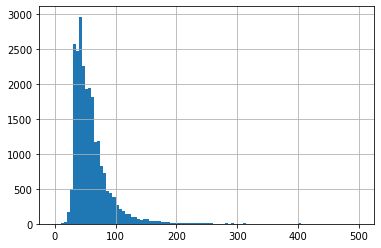

In [46]:
print(data['total_area'].describe())
data['total_area'].hist(bins=100, range=(0, 500))
plt.show()

###### Вывод

На гистограмме можно видеть среднее и медианое значение: 60 и примерно 50 (точно - 52). Гистограмма скошена вправо, значения распределены примерно до 260, далее идут одиночные значения вплоть до 900 (max) - выбросы. Данные полученные методом describe() находят свое подтверждение на гистограмме. 

###### 2) Цена квартиры

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
763000000


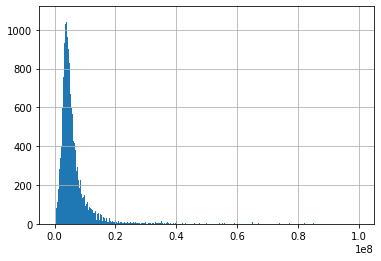

In [41]:
print(data['last_price'].describe())
print(data['last_price'].max())

data['last_price'].hist(bins=500, range=(0, 100000000))
plt.show()

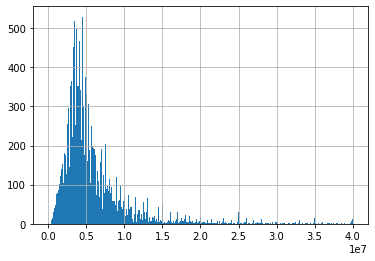

In [42]:
data['last_price'].hist(bins=500, range=(0, 40000000))
plt.show()

###### Вывод

На гистограмме можно видеть большой разброс между значениями среднего и медианы: примерно 6,5 млн. руб. и примерно 4,5 млн. руб. Гистограмма сильно скошена вправо, значения распределены примерно до 20 млн. руб., далее идут одиночные значения вплоть до 763 млн. руб. (max) - выбросы. Данные полученные методом describe() находят свое подтверждение на гистограмме. 

###### 3) Число комнат

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
19


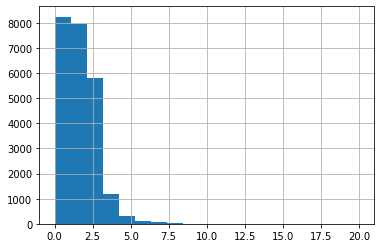

In [43]:
print(data['rooms'].describe())
print(data['rooms'].max())

data['rooms'].hist(bins=19, range=(0, 20))
plt.show()

###### Вывод

На гистограмме можно видеть близкие значения среднего и медианы: 2. На гистограмме сразу бросается в глаза, что подавляющее количество объектов в объявлениях имеет от 1 до 4 комнат, при этом однушек и двушек больше всего.

###### 4) Высота потолков

count    14504.000000
mean         2.765294
std          0.970569
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64


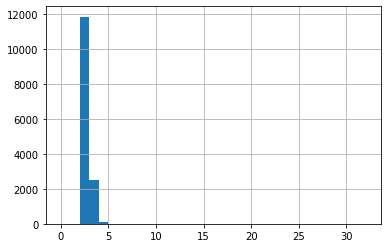

In [44]:
print(data['ceiling_height'].describe())

data['ceiling_height'].hist(bins=32, range=(0, 32))
plt.show()

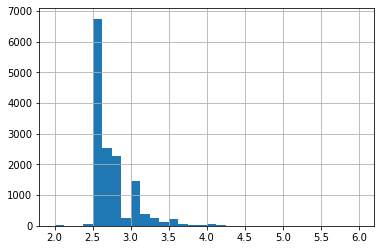

In [45]:
data['ceiling_height'].hist(bins=32, range=(2, 6))
plt.show()

###### Вывод

На гистограмме можно видеть очень близкие значения среднего и медианы: примерно 2,7м и 2,6м соотвтственно. Основное количество значений распределено между 2,5 и 4 м, что вобщем то соответствует реальности - большинство квартир имеет высоту потолков в данном диапазоне. 

### 4.2 Изучим время продажи квартир.

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


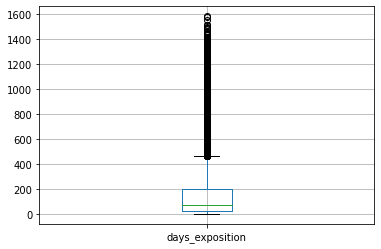

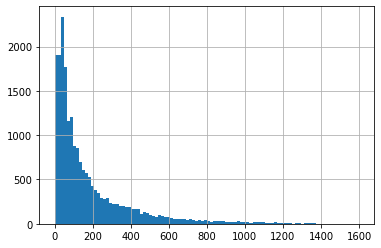

In [123]:
print(data['days_exposition'].describe())

data.boxplot(column='days_exposition')
plt.show()
data[data['days_exposition'] != 0]['days_exposition'].hist(bins=100, range=(0, 1600))
plt.show()

###### Вывод

На гистограмме можно видеть разброс значений среднего и медианы: примерно 180 и 95 дней соответственно. Разброс достаточно большой, это и не удивительно, основное количество значений сосредоточенно в интервале от 1 до 600 дней, далее количество объявлений сильно падает, но время публикации объявлений сильно растет.

Определим количество объявлений со значениями более 600 дней публикации и построим гистограмму для значений от 1 до 600 дней.

In [46]:
data.query('days_exposition > 600').count()

total_images              1198
last_price                1198
total_area                1198
first_day_exposition      1198
rooms                     1198
ceiling_height             780
floors_total              1198
living_area               1132
floor                     1198
is_apartment              1198
studio                    1198
open_plan                 1198
kitchen_area              1117
balcony                   1198
locality_name             1197
airports_nearest           952
cityCenters_nearest        951
parks_around3000          1198
parks_nearest              475
ponds_around3000          1198
ponds_nearest              541
days_exposition           1198
price_per_square_meter    1198
day_of_publication        1198
month_of_publication      1198
year_of_publication       1198
location_flat_floor       1198
ratio_living_total        1132
ratio_kitchen_total       1117
dtype: int64

0.05055065614582894


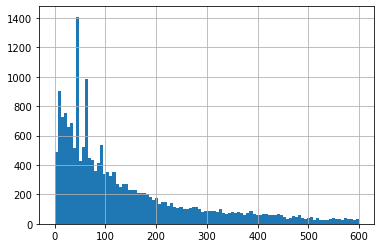

In [47]:
print(1198/23699)
data.query('days_exposition < 600 and days_exposition != 0')['days_exposition'].hist(bins=100, range=(0, 600))
plt.show()

###### Вывод

Значений более 600 дней не много - всего 5%, но продолжительность их публикации доходит до 1580 дней.

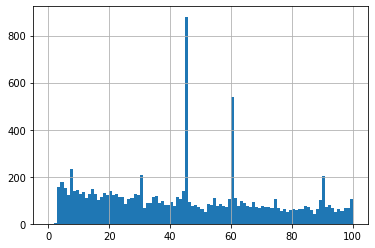

In [48]:
data.query('days_exposition < 600 and days_exposition !=0')['days_exposition'].hist(bins=100, range=(0, 100))
plt.show()

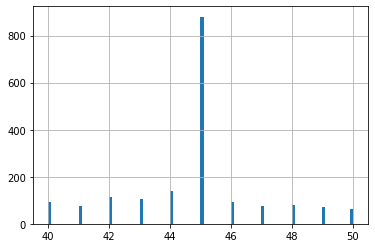

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
78,9,4350000,37.0,2018-02-22,1,NaN,19,18.0,6,True,False,False,10.7,0,Санкт-Петербург,34324.0,14192.0,0,NaN,0,NaN,45,117568.0,3,2,2018,Другой,0.486486,0.289189
89,9,2500000,63.0,2018-10-25,3,2.50,5,43.0,4,True,False,False,9.0,0,посёлок городского типа Сиверский,NaN,NaN,0,NaN,0,NaN,45,39683.0,3,10,2018,Другой,0.682540,0.142857
110,6,3850000,72.3,2017-09-29,2,NaN,3,27.4,2,True,False,False,23.6,0,деревня Пикколово,NaN,NaN,0,NaN,0,NaN,45,53250.0,4,9,2017,Другой,0.378976,0.326418
153,12,4350000,55.0,2017-05-21,2,2.57,9,31.2,2,True,False,False,8.3,0,Петергоф,45958.0,34425.0,1,589.0,0,NaN,45,79091.0,6,5,2017,Другой,0.567273,0.150909
158,15,3100000,47.3,2017-11-07,2,NaN,5,27.5,2,True,False,False,8.5,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,45,65539.0,1,11,2017,Другой,0.581395,0.179704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000,43.4,2018-01-11,2,NaN,5,NaN,1,True,False,False,NaN,0,Санкт-Петербург,22001.0,14193.0,1,202.0,2,397.0,45,66820.0,3,1,2018,Первый,NaN,NaN
23613,4,3950000,52.0,2018-03-04,3,NaN,5,NaN,2,True,False,False,NaN,0,посёлок Парголово,55549.0,21223.0,0,NaN,0,NaN,45,75962.0,6,3,2018,Другой,NaN,NaN
23670,9,2450000,45.6,2018-02-08,1,2.80,9,NaN,2,True,False,False,NaN,0,поселок городского типа Синявино,NaN,NaN,0,NaN,0,NaN,45,53728.0,3,2,2018,Другой,NaN,NaN
23679,0,2500000,35.0,2017-12-08,1,NaN,9,NaN,4,True,False,False,NaN,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45,71429.0,4,12,2017,Другой,NaN,NaN


In [49]:
data.query('days_exposition < 600')['days_exposition'].hist(bins=100, range=(40, 50))
plt.show()

display(data.query('days_exposition > 44 & days_exposition < 46'))

###### Вывод

Наиболее часто встречаемое время публикации составляет 44-46 дней - более 1000 объявлений.

###### Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

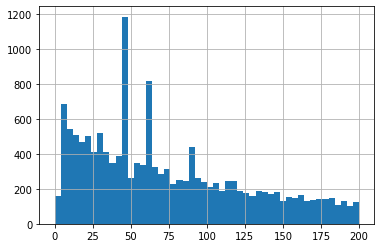

In [50]:
data.query('days_exposition < 200 and days_exposition !=0')['days_exposition'].hist(bins=50, range=(0, 200))

#data.query('days_exposition < 100')['days_exposition'].hist(bins=100, range=(0, 10))
plt.show()

Можно принять, время когда сделки по продаже квартир прошли очень быстро - до 1 месяца (30 дней), а время когда сделки прошли очень долго - свыше 2 лет (720 дней). Выясним какой процент из общего числа сделок составят очень быстрые и необычайно долгие сделки.

In [51]:
quantity_fast_trades = data.query('days_exposition <= 30')['days_exposition'].count() # количество быстрых продаж
percentage_fast_trades = quantity_fast_trades / 23699 # процент быстрых продаж
print(quantity_fast_trades)
print(percentage_fast_trades)

6919
0.29195324697244607


In [52]:
quantity_slow_trades = data.query('days_exposition > 720')['days_exposition'].count() # количество долгих продаж
percentage_slow_trades = quantity_slow_trades / 23699 # процент долгих продаж
print(quantity_slow_trades)
print(percentage_slow_trades)

784
0.03308156462297987


###### Вывод

В результате подсчетов: количество быстрых сделок - 3738, что составляет почти 16% от общего числа сделок; количество необычно долгих сделок - 768, что составляет около 3% от общего числа сделок. При необходимости можно принять интервалы, включающие быстрые и медленные сделки, иными. Расчеты будут проводится аналогичным образом.

In [53]:
# количество и процент долгих продаж для условия, что необычно долгие продажи от года до 1,5 лет
quantity_slow_trades_1 = data.query('days_exposition > 365 & days_exposition < 548')['days_exposition'].count()
percentage_slow_trades_1 = quantity_slow_trades_1 / 23699
print(quantity_slow_trades_1)
print(percentage_slow_trades_1)

1558
0.06574117051352378


### 4.3 Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружены.

Для понимания какие редкие и выбивающиеся значения можно убрать, построим диаграммы размаха для столбцов.

###### 1)Столбец 'last_price'

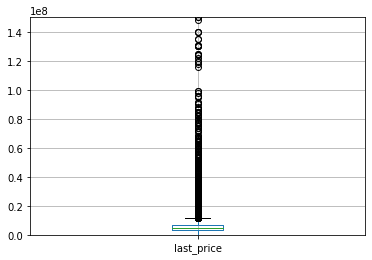

In [55]:
boxplot = data.boxplot(column='last_price')
plt.ylim(0, 150000000)
plt.show()

In [56]:
display(data.query('last_price <= 10000000'))
print(23699 - 20978)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.4,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95066.0,0,9,2018,Другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.6,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99196.0,3,11,2017,Другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,False,False,8.00,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239,73718.0,4,8,2016,Другой,0.641026,0.128205
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,0,72491.0,1,3,2017,Другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542.0,0,1,2018,Другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,0,44092.0,6,2,2018,Первый,0.523810,NaN


2721


По диаграмме видно, что до 10 млн.руб. значения идут достаточно плотно, после этого располагаются одиночные значения. Исключим все значения больше 10 млн.руб. Таких значений - 2721.

###### 2)Столбец 'total_area'

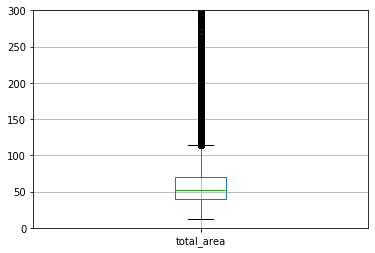

In [57]:
boxplot = data.boxplot(column=['total_area'])
plt.ylim(0, 300)
plt.show()

In [58]:
display(data.query('total_area <= 120'))
print(23699 - 22637)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95066.0,0,9,2018,Другой,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,False,False,8.0,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239,73718.0,4,8,2016,Другой,0.641026,0.128205
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,True,False,False,8.5,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542.0,0,1,2018,Другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,0,44092.0,6,2,2018,Первый,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,True,False,False,23.3,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,149511.0,1,3,2017,Другой,NaN,0.303583


1062


По диаграмме видно, что основная часть значений расположена в пределах площади до 120 кв.м. Исключим все значения более этого. Таких значений - 1062.

###### 3) Столбец 'rooms'

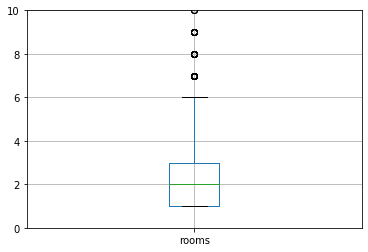

In [59]:
boxplot = data.boxplot(column=['rooms'])
plt.ylim(0, 10)
plt.show()

In [60]:
display(data.query('rooms <= 6'))
print(23699 - 23609)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,0,72491.0,1,3,2017,Другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542.0,0,1,2018,Другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,0,44092.0,6,2,2018,Первый,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,149511.0,1,3,2017,Другой,NaN,0.303583


90


По диаграмме хорошо видно, основная масса значений сосредоточена на отрезе от 1 до 6 комнат, далее идут редкие единичные значения - 90. Исключим их.

###### 4) Столбец 'ceiling_height'

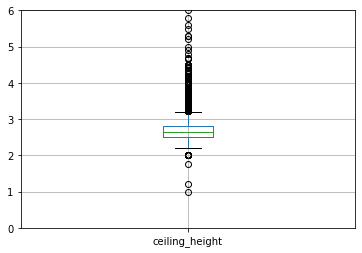

In [61]:
boxplot = data.boxplot(column=['ceiling_height'])
plt.ylim(0, 6)
plt.show()

In [62]:
display(data.query('(ceiling_height > 2 & ceiling_height <= 4) | ceiling_height.isna()'))
print(23699 - 23610)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,0,72491.0,1,3,2017,Другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542.0,0,1,2018,Другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,0,44092.0,6,2,2018,Первый,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,149511.0,1,3,2017,Другой,NaN,0.303583


89


Значения высоты потолка в квартирах в основном сосредоточены на промежутке от 2 до 4 метров. Количество значений выходящих за данные пределы - 89. Исключим их.

###### 5) Столбец 'cityCenters_nearest'

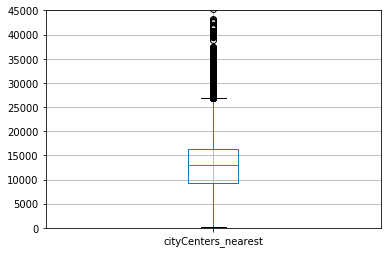

In [63]:
boxplot = data.boxplot(column=['cityCenters_nearest'])
plt.ylim(0, 45000)
plt.show()

In [64]:
display(data.query('cityCenters_nearest <= 35000'))
print(18180 - 17755)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52.00,2018-07-19,2,NaN,5,31.0,2,True,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15,105769.0,3,7,2018,Другой,0.596154,0.115385
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,True,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519,129904.0,3,10,2016,Другой,0.552812,0.145405
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,True,False,False,8.00,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239,73718.0,4,8,2016,Другой,0.641026,0.128205
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,0,72491.0,1,3,2017,Другой,0.547792,0.103356


425


Основная часть значений располагается примерно до 26 км. Возъмем с запасом - 35 км. Количество значений выходящих за данные пределы - 425. Исключим их.

###### 6) С помощью метода query() избавимся от выбивающихся и редких значений в отработанных столбцах.

In [67]:
good_data = data.query('last_price <= 10000000')
good_data = good_data.query('total_area <= 120')
good_data = good_data.query('rooms <= 6')
good_data = good_data.query('(ceiling_height > 2 & ceiling_height <= 4) | ceiling_height.isna()')  # срез по высоте потолка
display(good_data)

len(good_data)/len(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95066.0,0,9,2018,Другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,True,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99196.0,3,11,2017,Другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.0,2017-07-07,1,NaN,5,17.5,4,True,False,False,6.0,0,Тихвин,NaN,NaN,0,NaN,0,NaN,413,45000.0,4,7,2017,Другой,0.583333,0.200000
23693,9,4600000,62.4,2016-08-05,3,2.60,9,40.0,8,True,False,False,8.0,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239,73718.0,4,8,2016,Другой,0.641026,0.128205
23695,14,3100000,59.0,2018-01-15,3,NaN,5,38.0,4,True,False,False,8.5,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542.0,0,1,2018,Другой,0.644068,0.144068
23696,18,2500000,56.7,2018-02-11,2,NaN,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,0,44092.0,6,2,2018,Первый,0.523810,NaN


0.8799949364952108

### 4.4 Изучим какие факторы больше всего влияют на стоимость квартиры? Зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, а также зависимость от даты размещения: дня недели, месяца и года.

###### 1) Зависимость цены от площади квартиры

Коэффициент корреляции Пирсона: 0.6635463107047308


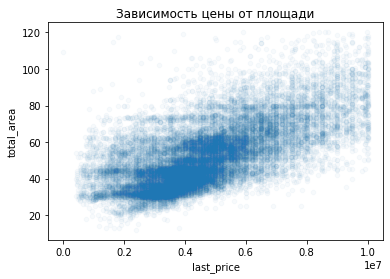

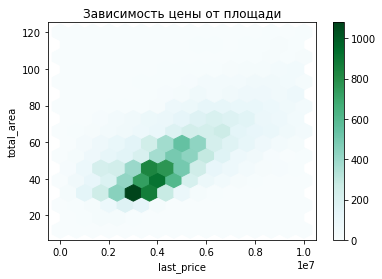

In [68]:
good_data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.03, title='Зависимость цены от площади')
good_data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=15, sharex=False, title='Зависимость цены от площади')

print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['total_area']))

###### Вывод

Диограммы показывают довольно сильную положительную взаимосвязь цены и площади. Это же подтверждает коэффициент корреляции - 0,677. Чем больше площадь квартиры, тем выше цена на нее. Наиболее сильно выражена эта взаимосвязь у квартир с не очень большой площадью примерно от 30 до 60 кв.м. Квартиры именно таких площадей пользуются самым большим спросом. У квартир с площадь более 100 кв.м связь существенно ослабевает, стоимость выставляется в основном с ориентиром на свое желание, а не с ориентиром на стоимость других квартир такой площади. Это происходит потоу, что чем площадь квартиры больше, тем меньше таких аналогичных квартир и поэтому все меньше квартир на которые стоит ориентироваться для выбора цены.

###### 2) Зависимость цены от числа комнат

Коэффициент корреляции Пирсона: 0.4221703471214269


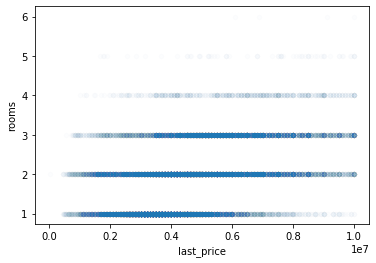

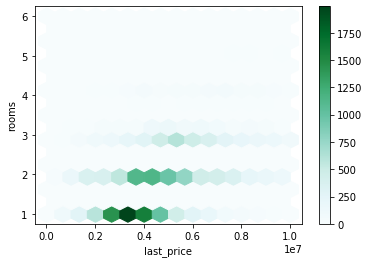

In [69]:
good_data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.01)
good_data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=15, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['rooms']))

###### Вывод

Зависимость стоимости от количества комнат то же есть и она положительная, но она существенно ниже зависимости цены от площади. Это подтверждает коэффициент корреляции - 0,422. Чем больше комнат в квартире, тем выше цена на нее. Наиболее сильно выражена эта взаимосвязь у однокомнатных и двухкомнатных квартир, далее эта связь ослабевает и у квартир начиная с четырехкомнатных эта связь практически исчезает.

###### 1) Зависимость цены от удаленности от центра

Коэффициент корреляции Пирсона: -0.33515293153342285


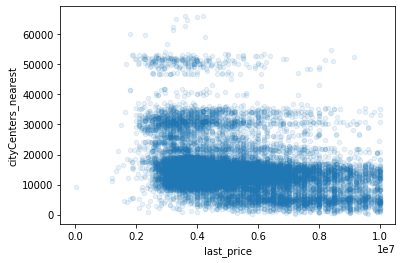

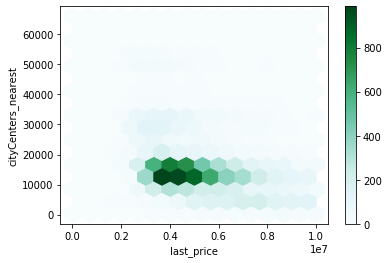

In [70]:
good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.1)
good_data.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=15, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['cityCenters_nearest']))

###### Вывод

На данных диаграммах мы наблюдаем отрицательную (обратную) зависимость стоимости квартир от удаленности от центра, т.е. чем расстояние больше, тем меньше стоимости квартиры. Коэффициент корреляции - 0,335 (умеренный). Если присмотреться то области расположены так, что если соединить темные области на графике, получится линия идущая снизу справа к верху влево, это соответствует отрицательному коэффициенту корреляции и показывает умеренную отрицательную связь между ценой и удаленностью от центра.

А наибольшее скопление точек (примерно от 2,5 до 10 млн.руб., удаленных на расстояние примерно от 5 до 20 км) может говорить о том, что таких квартир наибольшее количество из всей выборки.

###### 4) Зависимость цены от этажа, на котором расположена квартира

In [73]:
display(good_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,True,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95066.0,0,9,2018,Другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,True,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99196.0,3,11,2017,Другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.0,2017-07-07,1,NaN,5,17.5,4,True,False,False,6.0,0,Тихвин,NaN,NaN,0,NaN,0,NaN,413,45000.0,4,7,2017,Другой,0.583333,0.200000
23693,9,4600000,62.4,2016-08-05,3,2.60,9,40.0,8,True,False,False,8.0,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239,73718.0,4,8,2016,Другой,0.641026,0.128205
23695,14,3100000,59.0,2018-01-15,3,NaN,5,38.0,4,True,False,False,8.5,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542.0,0,1,2018,Другой,0.644068,0.144068
23696,18,2500000,56.7,2018-02-11,2,NaN,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,0,44092.0,6,2,2018,Первый,0.523810,NaN


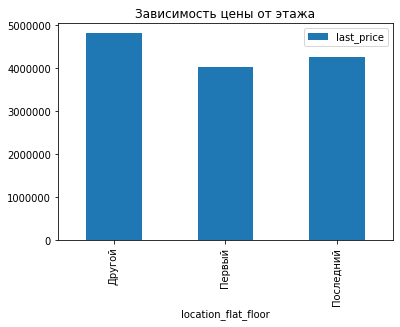

In [75]:
good_data_floor_price = good_data.pivot_table(index='location_flat_floor', values='last_price')
good_data_floor_price.plot(y='last_price', kind='bar', title='Зависимость цены от этажа')

###### Вывод

На диаграмме видна зависимость средней цены за квартиру от этажа. Наибольшая стоимость у квартир не на первом и не на последнем этаже. Дешевле всего - квартиры, расположенные на первом этаже. 

###### 5) Зависимость цены от дня размещения объявления

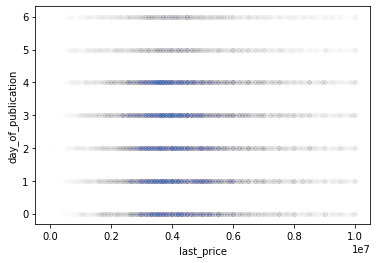

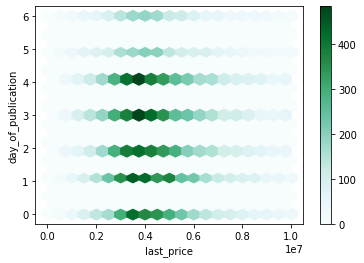

In [76]:
good_data.plot(x='last_price', y='day_of_publication', kind='scatter', alpha=0.005)
good_data.plot(x='last_price', y='day_of_publication', kind='hexbin', gridsize=20, sharex=False)

#print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['day_of_publication']))

###### Вывод

В соответствии с графиком зависимости между стоимостью и днем размещения объявления практически нет, либо связь нелинейная и более сложная. Использовать коэффициент корреляции в данном случае - нецелесообразно.

###### 6) Зависимость цены от месяца размещения объявления

Коэффициент корреляции Пирсона: 0.0012759511939180476


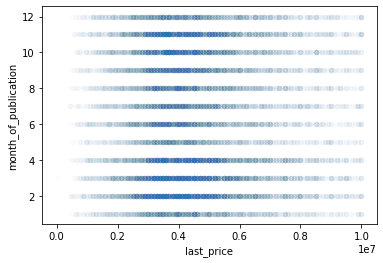

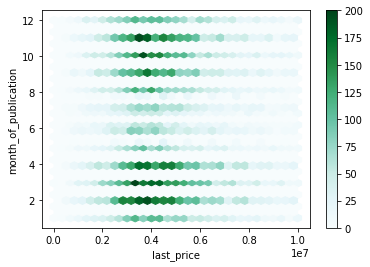

In [77]:
good_data.plot(x='last_price', y='month_of_publication', kind='scatter', alpha=0.01)
good_data.plot(x='last_price', y='month_of_publication', kind='hexbin', gridsize=30, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['month_of_publication']))

###### Вывод

Судя по диаграммам и коэфициенту корреляции зависимости между ценой и месяцем публикации объявления нет практически никакой. Но при этом две затемненные области в начале и в конце года могут говорить о налии какой-то зависимости, но эта зависимость более сложная и нелинейная. Цена повышается в начале весны и падает в конце осени.

###### 7) Зависимость цены от года размещения объявления

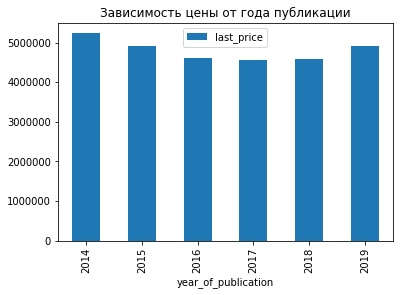

In [79]:
good_data_year_price = good_data.pivot_table(index='year_of_publication', values='last_price')
good_data_year_price.plot(y='last_price', kind='bar', title='Зависимость цены от года публикации')
plt.show()

###### Вывод

В соответствии с новым графиком просматривается зависимость средней цены на квартиры от года публикации. Период с 2014 по 2017 годы характеризуется снижением цены, начиная с 2018 года цена расти. Эта зависимость может быть продиктована какими-либо внешними условиями на рынке квартир.

### 4.5 Изучим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья

###### 1) Найдем 10 населённых пунктов с наибольшим числом объявлений.

In [80]:
locality_10 = good_data['locality_name'].value_counts().head(10) # создаем таблицу с топ-10 городов с с мах количеством объявлений
print(locality_10)
print()

Санкт-Петербург      13039
посёлок Мурино         520
посёлок Шушары         437
Всеволожск             390
Колпино                335
Пушкин                 331
посёлок Парголово      326
Гатчина                302
деревня Кудрово        297
Выборг                 229
Name: locality_name, dtype: int64



In [81]:
locality_10_list = good_data['locality_name'].value_counts().head(10).index.tolist() # создаем список из этих топ-10 городов
print(locality_10_list)

['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино', 'Пушкин', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


###### 2) Найдем среднюю цену квадратного метра в этих 10-ти населённых пунктах.

In [83]:
# создаем таблицу со значениями 10-ти городов в столбце 'locality_name'
good_data_10 = good_data[good_data['locality_name'].isin(locality_10_list)]
display(good_data_10.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82921.0,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99196.0,3,11,2017,Другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0,110545.0,3,4,2019,Другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189,87455.0,2,5,2018,Другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88525.0,6,2,2017,Другой,0.714754,0.106557
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.0,3,11,2017,Другой,0.512626,0.214646
14,1,4400000,36.00,2016-06-23,1,NaN,6,17.00,1,True,False,False,8.00,0,Пушкин,20782.0,30759.0,0,NaN,1,96.0,203,122222.0,3,6,2016,Первый,0.472222,0.222222
15,16,4650000,39.00,2017-11-18,1,NaN,14,20.50,5,True,False,False,7.60,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19,119231.0,5,11,2017,Другой,0.525641,0.194872


In [84]:
len(good_data_10)

16206

In [85]:
# создаем таблицу со средними значениями стоимости квадратного метра площади
good_data_10_mean = good_data_10.groupby('locality_name')['price_per_square_meter'].mean()
print(good_data_10_mean)

locality_name
Всеволожск            66877.210256
Выборг                58280.161572
Гатчина               68675.413907
Колпино               75221.868657
Пушкин                99971.054381
Санкт-Петербург      104444.674822
деревня Кудрово       92392.956229
посёлок Мурино        85725.234615
посёлок Парголово     90332.236196
посёлок Шушары        78610.048055
Name: price_per_square_meter, dtype: float64


###### 3) Выделим среди 10 выбранных населённых пунктов  пункты с самой высокой и низкой стоимостью жилья¶

In [86]:
good_data_10_mean.columns = ['locality_name', 'price_per_square_meter_mean']
print(good_data_10_mean.sort_values(ascending=False)) # используем метод sort_values() для сортировки значений и определения max и min
good_data_10_mean.columns


locality_name
Санкт-Петербург      104444.674822
Пушкин                99971.054381
деревня Кудрово       92392.956229
посёлок Парголово     90332.236196
посёлок Мурино        85725.234615
посёлок Шушары        78610.048055
Колпино               75221.868657
Гатчина               68675.413907
Всеволожск            66877.210256
Выборг                58280.161572
Name: price_per_square_meter, dtype: float64


['locality_name', 'price_per_square_meter_mean']

###### Вывод

В результате работы отобраны 10 населенных пунктов с самым большим количеством объявлений. Найдены средние значения стоимости за квадратный метр площади.

Самая большая стоимость квадратного метра жилплощади отмечается в Санкт-Петербурге - 104444 руб. за кв.м.

Самая низкая стоимость квадратного метра жилплощади отмечается в Выборге - 58280 руб. за кв.м.

### 4.6 Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Выясним какая область входит в центр. Создадим столбец с расстоянием до центра в километрах. Посчитаем среднюю цену для каждого километра. Построим график зависимости цены от удалённости от центра. Определим границу центральной зоны.

###### 1) Выделим квартиры в Санкт-Петербурге.

In [87]:
# создадим новую таблицу включающую только объявления в Санкт-Петербурге
good_data_Peterburg = good_data.query('locality_name == "Санкт-Петербург"')
display(good_data_Peterburg)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,True,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0,110545.0,3,4,2019,Другой,NaN,0.263966
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,True,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88525.0,6,2,2017,Другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,True,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.0,3,11,2017,Другой,0.512626,0.214646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39.0,2017-12-16,1,NaN,9,20.0,6,True,False,False,11.0,2,Санкт-Петербург,40837.0,16704.0,0,NaN,0,NaN,38,82051.0,5,12,2017,Другой,0.512821,0.282051
23688,19,9200000,101.0,2019-04-01,3,3.05,15,63.0,12,True,False,False,15.0,0,Санкт-Петербург,15632.0,14428.0,0,NaN,0,NaN,23,91089.0,0,4,2019,Другой,0.623762,0.148515
23689,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,True,False,False,9.1,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29,100567.0,2,2,2018,Другой,0.461756,0.257790
23690,3,5500000,52.0,2018-07-19,2,NaN,5,31.0,2,True,False,False,6.0,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15,105769.0,3,7,2018,Другой,0.596154,0.115385


###### 2) Выясним какая область входит в центр

    Cоздадим новый столбец 'cityCenters_nearest_km' с растоянием до центра в километрах

In [88]:
# переведем расстояние до центра в километры и округлим
good_data_Peterburg.loc[:, 'cityCenters_nearest_km'] = (good_data_Peterburg.loc[:, 'cityCenters_nearest']/1000).round()
display(good_data_Peterburg)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total,cityCenters_nearest_km
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,0.612500,0.148214,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,0.320000,0.410000,8.0
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,True,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0,110545.0,3,4,2019,Другой,NaN,0.263966,12.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,True,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88525.0,6,2,2017,Другой,0.714754,0.106557,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,True,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.0,3,11,2017,Другой,0.512626,0.214646,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39.0,2017-12-16,1,NaN,9,20.0,6,True,False,False,11.0,2,Санкт-Петербург,40837.0,16704.0,0,NaN,0,NaN,38,82051.0,5,12,2017,Другой,0.512821,0.282051,17.0
23688,19,9200000,101.0,2019-04-01,3,3.05,15,63.0,12,True,False,False,15.0,0,Санкт-Петербург,15632.0,14428.0,0,NaN,0,NaN,23,91089.0,0,4,2019,Другой,0.623762,0.148515,14.0
23689,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,True,False,False,9.1,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29,100567.0,2,2,2018,Другой,0.461756,0.257790,16.0
23690,3,5500000,52.0,2018-07-19,2,NaN,5,31.0,2,True,False,False,6.0,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15,105769.0,3,7,2018,Другой,0.596154,0.115385,6.0


    I. Посчитаем среднюю цену квартиры для каждого километра расстояния от центра, построим график зависимости и определим границу центра для цены.

In [89]:
# средняя цена квартиры для каждого километра расстояния от центра
good_data_Peterburg_pivot_price = good_data_Peterburg.pivot_table(index='cityCenters_nearest_km', values='last_price').reset_index()
print(good_data_Peterburg_pivot_price)

    cityCenters_nearest_km    last_price
0                      0.0  7.141429e+06
1                      1.0  7.566134e+06
2                      2.0  7.477669e+06
3                      3.0  6.794635e+06
4                      4.0  7.064850e+06
5                      5.0  6.978710e+06
6                      6.0  6.674663e+06
7                      7.0  6.246452e+06
8                      8.0  6.175821e+06
9                      9.0  5.289358e+06
10                    10.0  5.165527e+06
11                    11.0  5.132843e+06
12                    12.0  5.145797e+06
13                    13.0  5.306824e+06
14                    14.0  5.161638e+06
15                    15.0  5.139439e+06
16                    16.0  5.010637e+06
17                    17.0  4.735076e+06
18                    18.0  4.583950e+06
19                    19.0  4.763322e+06
20                    20.0  5.747151e+06
21                    21.0  5.347625e+06
22                    22.0  5.147736e+06
23              

    Построим график зависимости цены от удалённости от центра.

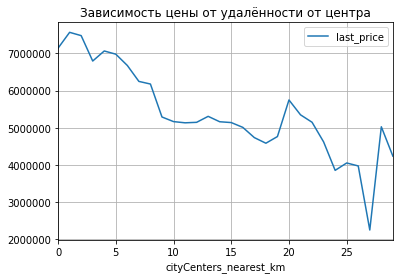

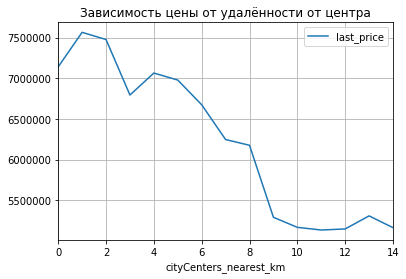

In [90]:
good_data_Peterburg_pivot_price.plot(x='cityCenters_nearest_km', y ='last_price', grid=True, title='Зависимость цены от удалённости от центра')
plt.show()

good_data_Peterburg_pivot_price.query('cityCenters_nearest_km <= 14').plot(x='cityCenters_nearest_km', y ='last_price', grid=True, title='Зависимость цены от удалённости от центра')
plt.show()

###### Вывод

На графике зависимости цены от расстояния от центра видно довольно стремительное падение цены до отметки примерно 9 км, после этого идет выравнивание. На отметке 20 км - небольшой пик, он заметен и в таблице выше.

Считаю, что в качестве границы центра для зависимости цены от расстояния до центра следует взять пятно радиусом 9 км.

II. Посчитаем среднюю цену за квадратный метр для каждого километра расстояния от центра, построим график зависимости и определим границу центра для цены за квадратный метр.

In [91]:
# средняя цена за квадратный метр для каждого километра расстояния от центра
good_data_Peterburg_pivot_price_m = good_data_Peterburg.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter').reset_index()
print(good_data_Peterburg_pivot_price_m)

    cityCenters_nearest_km  price_per_square_meter
0                      0.0           111429.714286
1                      1.0           118235.463415
2                      2.0           112352.880795
3                      3.0           107004.037915
4                      4.0           114144.719072
5                      5.0           119127.012270
6                      6.0           121025.956284
7                      7.0           114812.634981
8                      8.0           113711.680095
9                      9.0           105342.808000
10                    10.0           107070.845411
11                    11.0           103602.206864
12                    12.0           105126.923803
13                    13.0           105409.056103
14                    14.0           103114.211443
15                    15.0           101878.728532
16                    16.0            98961.061779
17                    17.0            94764.683073
18                    18.0     

    Построим график зависимости цены за квадратный метр от удалённости от центра.

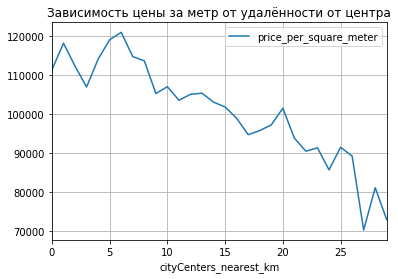

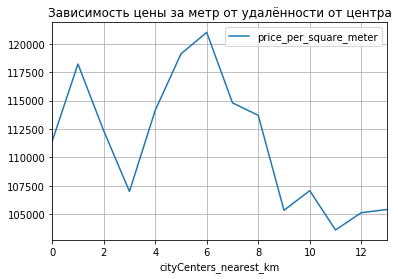

In [92]:
good_data_Peterburg_pivot_price_m.plot(x='cityCenters_nearest_km', y ='price_per_square_meter', grid=True, title='Зависимость цены за метр от удалённости от центра')
plt.show()

good_data_Peterburg_pivot_price_m.query('cityCenters_nearest_km <= 13').plot(x='cityCenters_nearest_km', y ='price_per_square_meter', grid=True, title='Зависимость цены за метр от удалённости от центра')
plt.show()

###### Вывод

В качестве границы центра для зависимости цены за квадратный метр от расстояния до центра следует взять пятно радиусом 9 км, так же как и при зависимости цены от расстояния от центра. Так же, как и в предыдущем пункте график стремительно падает до 9 км, затем имеет более пологую форму.

### 4.7 Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

###### 1) Выделим сегмент квартир в центре.

В качестве границы центра для зависимости цены от расстояния до центра мы приняли пятно радиусом 9 км.

In [93]:
good_data.loc[:, 'cityCenters_nearest_km'] = (good_data.loc[:, 'cityCenters_nearest']/1000).round()

good_data_centr = good_data.query('cityCenters_nearest_km <= 9').sort_values(by='cityCenters_nearest_km')
display(good_data_centr)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,location_flat_floor,ratio_living_total,ratio_kitchen_total,cityCenters_nearest_km
1934,18,9590000,108.00,2017-05-23,2,3.30,5,59.00,2,False,False,False,11.00,0,Санкт-Петербург,21908.0,287.0,3,359.0,3,290.0,69,88796.0,1,5,2017,Другой,0.546296,0.101852,0.0
2988,2,5300000,49.00,2016-11-09,3,NaN,3,30.00,3,True,False,False,7.00,0,Санкт-Петербург,21919.0,467.0,2,256.0,3,305.0,232,108163.0,2,11,2016,Последний,0.612245,0.142857,0.0
2609,20,7200000,80.00,2017-08-24,3,2.80,4,43.00,1,True,False,False,8.00,0,Санкт-Петербург,21832.0,399.0,3,415.0,2,516.0,11,90000.0,3,8,2017,Первый,0.537500,0.100000,0.0
3800,12,6900000,47.60,2015-07-22,2,NaN,5,28.20,5,True,False,False,8.20,0,Санкт-Петербург,22074.0,472.0,3,319.0,3,142.0,398,144958.0,2,7,2015,Последний,0.592437,0.172269,0.0
22036,3,7200000,72.00,2017-12-21,2,3.07,3,44.90,2,True,False,False,12.30,0,Санкт-Петербург,21875.0,329.0,3,426.0,3,273.0,89,100000.0,3,12,2017,Другой,0.623611,0.170833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,8,4200000,44.63,2019-03-13,2,2.55,5,28.26,4,True,False,False,5.78,1,Санкт-Петербург,33153.0,9253.0,2,256.0,0,NaN,0,94107.0,2,3,2019,Другой,0.633206,0.129509,9.0
20060,0,3580000,46.00,2015-11-20,2,2.50,5,30.00,1,True,False,False,6.50,0,Санкт-Петербург,26906.0,8585.0,0,NaN,0,NaN,259,77826.0,4,11,2015,Первый,0.652174,0.141304,9.0
20063,0,4490000,44.00,2019-02-22,2,NaN,8,32.00,3,True,False,False,8.00,0,Санкт-Петербург,32364.0,9442.0,1,2416.0,2,488.0,7,102045.0,4,2,2019,Другой,0.727273,0.181818,9.0
6179,16,4999000,50.00,2018-01-13,2,NaN,9,31.40,8,True,False,False,5.50,0,Санкт-Петербург,29066.0,9350.0,2,15.0,3,296.0,131,99980.0,5,1,2018,Другой,0.628000,0.110000,9.0


###### 2) Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

    Площадь квартиры

count    2896.000000
mean       59.399306
std        20.032205
min        12.000000
25%        44.000000
50%        57.000000
75%        72.500000
max       120.000000
Name: total_area, dtype: float64


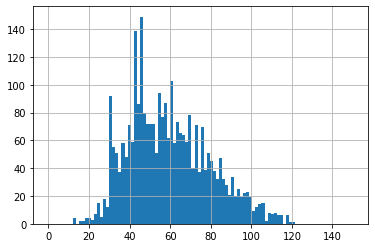

In [94]:
print(good_data_centr['total_area'].describe())
good_data_centr['total_area'].hist(bins=100, range=(0, 150))
plt.show()

###### Вывод

На гистограмме можно видеть примерно равные значения среднего и медианы: 59 и 60 соответственно. Много шумовых значений.

    Цена квартиры.

count    2.896000e+03
mean     6.499803e+06
std      1.905711e+06
min      1.219000e+04
25%      5.000000e+06
50%      6.500000e+06
75%      8.000000e+06
max      1.000000e+07
Name: last_price, dtype: float64
10000000


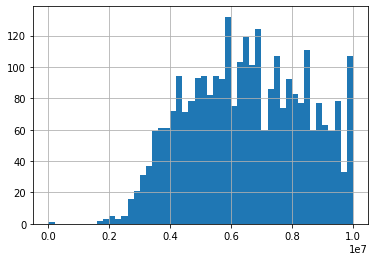

In [95]:
print(good_data_centr['last_price'].describe())
print(good_data_centr['last_price'].max())

good_data_centr['last_price'].hist(bins=50, range=(0, 10000000))
plt.show()

###### Вывод

Значения среднего и медианы практически совпадают и составляют 6,5 млн.

    Число комнат.

count    2896.000000
mean        2.136395
std         0.926882
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64
6


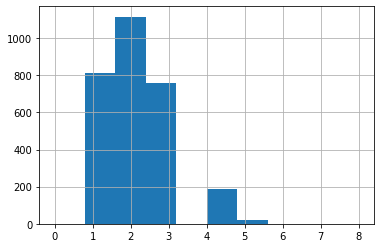

In [96]:
print(good_data_centr['rooms'].describe())
print(good_data_centr['rooms'].max())

good_data_centr['rooms'].hist(bins=10, range=(0, 8))
plt.show()

###### Вывод

В радиус 9 км попали квартиры с числом комнат до 6. наибольшее количество 2-х  и 3-х комнатных квартир.

    Высота потолков.

count    1841.000000
mean        2.920424
std         0.314642
min         2.400000
25%         2.700000
50%         2.900000
75%         3.100000
max         4.000000
Name: ceiling_height, dtype: float64


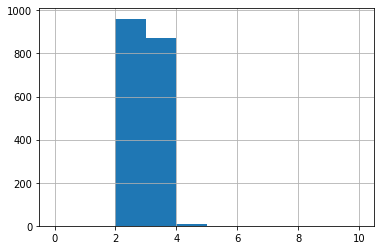

In [97]:
print(good_data_centr['ceiling_height'].describe())

good_data_centr['ceiling_height'].hist(bins=10, range=(0, 10))
plt.show()

###### Вывод

В радиус 9 км попали квартиры со стадартной высотой потолка от 2,4 до 4 м, Наибольшее число квартир с высотой от 2,4 до 3 м.

###### 3) Изучим факторы, влияющие на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления. 

 ###### Зависимость цены квартиры от числа комнат.

    1. Зависимость цены квартиры в центре от числа комнат.

Коэффициент корреляции Пирсона: 0.48267903305717785


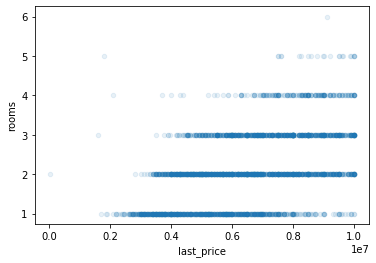

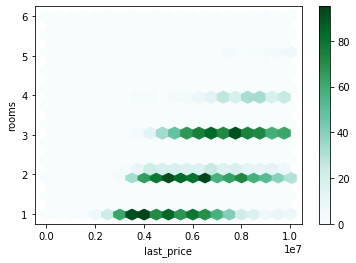

In [98]:
good_data_centr.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)
good_data_centr.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data_centr['last_price'].corr(good_data_centr['rooms']))

    2. Зависимость цены квартиры от числа комнат для всего датасета.

Коэффициент корреляции Пирсона: 0.4221703471214269


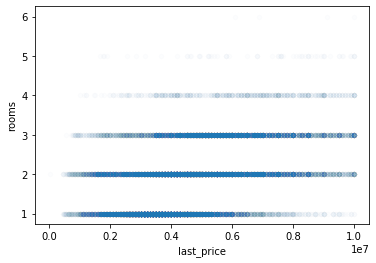

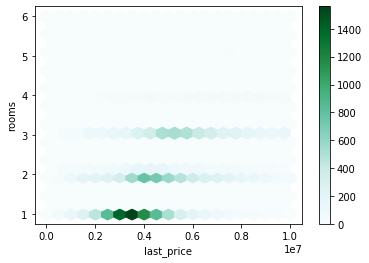

In [99]:
good_data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.01)
good_data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['rooms']))

<b>Вывод</b>

Зависимость стоимости квартиры в центре от количества комнат умеренная и она положительная. Это подтверждает коэффициент корреляции - 0,482. Чем больше комнат в квартире, тем выше цена на нее. Наиболее сильно выражена эта взаимосвязь у однокомнатных, двухкомнатных и трехкомнатных квартир, далее эта связь ослабевает и у квартир начиная с четырехкомнатных эта связь практически исчезает.

По графикам зависимости цены от количества комнат можно отчетливо увидеть, что взаимосвязь между ценой и количеством комнат у квартир которые находятся в центре более ярко выражена, чем у всего датасета. Кроме того, это подтверждает и коэффициент корреляции 0,482 для центра против 0,422 для всего датасета.

В отличии от зависимости стоимости всех квартир от количества комнат (корреляция - 0,422) здесь связь выше и распространяется кроме однокомнатныхи и двухкомнатных квартир еще и на трехкомнатные квартиры.

###### Зависимость цены от этажа.

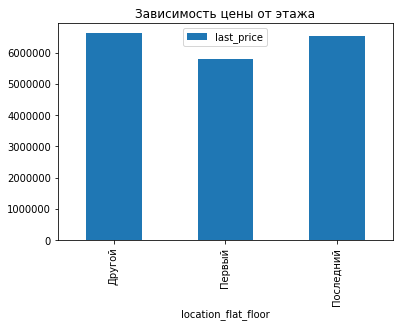

In [100]:
# pависимость цены на квартиры в центре от этажа, на котором расположена квартира
good_data_centr_floor_price = good_data_centr.pivot_table(index='location_flat_floor', values='last_price')
good_data_centr_floor_price.plot(y='last_price', kind='bar', title='Зависимость цены от этажа')

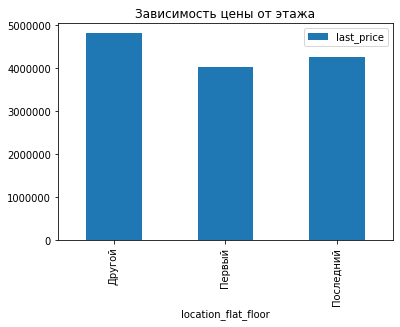

In [101]:
# pависимость цены на квартиры от этажа, на котором расположена квартира - в общем датасете
good_data_floor_price = good_data.pivot_table(index='location_flat_floor', values='last_price')
good_data_floor_price.plot(y='last_price', kind='bar', title='Зависимость цены от этажа')

<b>Вывод</b>

На двух полученных графикам (барплот) зависимости цены от этажа сразу видно различие между соответствующими взаимосвязями у квартир в центре и квартир во всем датасете. И для квартир в общем датасете и для квартир в центре прослеживается схожая взаимосвязь цены от этажа. Наибольшая стоимость у квартир не на первом и не на последнем этаже. Дешевле всего - квартиры, расположенные на первом этаже. Но для квартир в центре различие в средней цене на квартиры на последнем и на других этажах более размытая, т.е. средняя стоимость квартир, расположенных на всех этажах кроме первого практически одинаковая, для последнего этажа чуть чуть меньше чем для других. При этом по графикам видно что средняя цена для квартир в центре выше, чем для квартир во всем датасете, причем по всем этажам.

###### Зависимость цены от удаленности от центра.

    1) Зависимость цены от удаленности от центра для квартир, расположенных в центре.

Коэффициент корреляции Пирсона: -0.32516841947112046


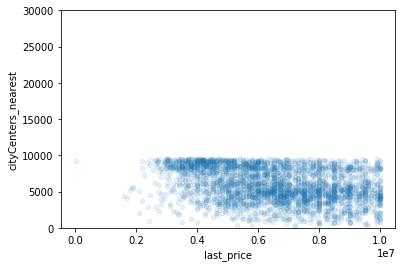

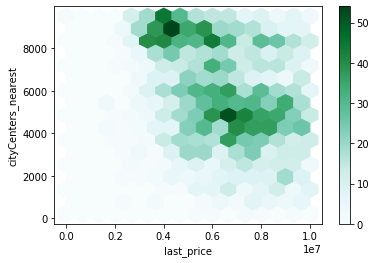

In [102]:
good_data_centr.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.1, ylim=(0, 30000))
good_data_centr.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=15, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data_centr['last_price'].corr(good_data_centr['cityCenters_nearest']))

    2) Зависимость цены от удаленности от центра для квартир во всем датасете.

Коэффициент корреляции Пирсона: -0.33515293153342285


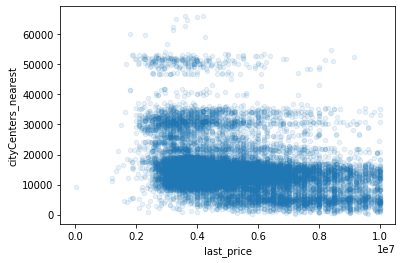

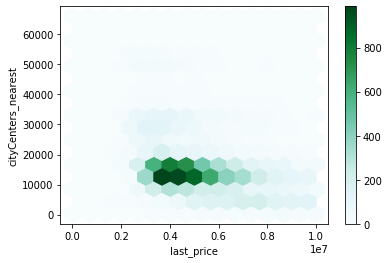

In [103]:
good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.1)
good_data.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=15, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['cityCenters_nearest']))

<b>Вывод</b>

Коэффициенты корреляции (-0,325 и -0,335) в обоих случаях говорят об одинаковой отрицательной связи между ценой и удаленностью от центра и для квартир в центре и для квартир во всем датасете. 

График зависимости для квартир в центре повторяет нижнюю часть график зависимости для квартир во всем датасете.

###### Зависимость цены от даты размещения объявления.

    1) Зависимость от дня размещения

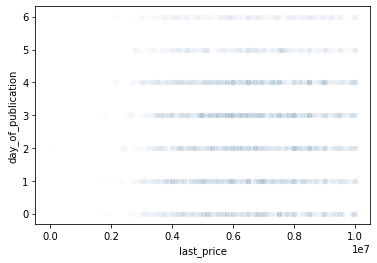

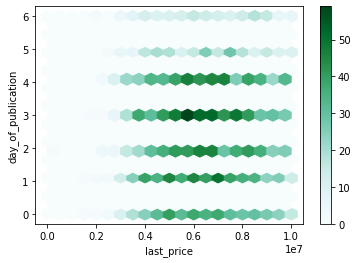

In [104]:
# для квартир в центре
good_data_centr.plot(x='last_price', y='day_of_publication', kind='scatter', alpha=0.01)
good_data_centr.plot(x='last_price', y='day_of_publication', kind='hexbin', gridsize=20, sharex=False)


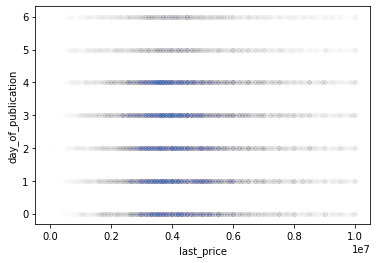

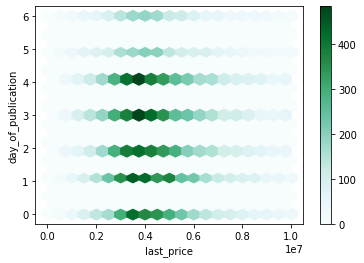

In [105]:
# для квартир во всем датасете
good_data.plot(x='last_price', y='day_of_publication', kind='scatter', alpha=0.005)
good_data.plot(x='last_price', y='day_of_publication', kind='hexbin', gridsize=20, sharex=False)


<b>Вывод</b>

В соответствии с обоими графиками зависимости между стоимостью и днем размещения объявления и для всего датасета и для квартир в центре практически нет, либо связь нелинейная и более сложная. Использовать коэффициент корреляции в данном случае - нецелесообразно.

    2) Зависимость от месяца размещения

Коэффициент корреляции Пирсона: 0.00400904749775815


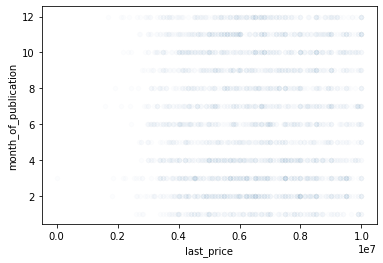

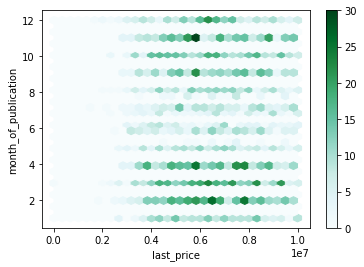

In [106]:
# для квартир в центре
good_data_centr.plot(x='last_price', y='month_of_publication', kind='scatter', alpha=0.01)
good_data_centr.plot(x='last_price', y='month_of_publication', kind='hexbin', gridsize=30, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data_centr['last_price'].corr(good_data_centr['month_of_publication']))

Коэффициент корреляции Пирсона: 0.0012759511939180476


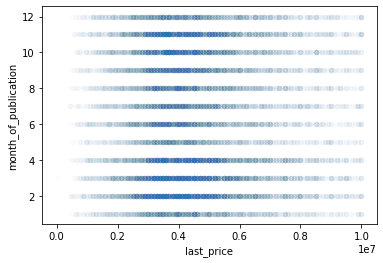

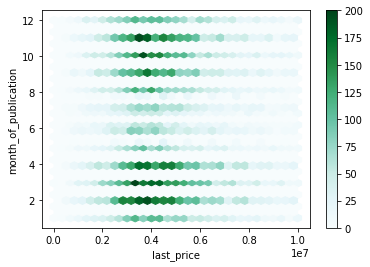

In [107]:
# для квартир во всем датасете
good_data.plot(x='last_price', y='month_of_publication', kind='scatter', alpha=0.01)
good_data.plot(x='last_price', y='month_of_publication', kind='hexbin', gridsize=30, sharex=False)

print('Коэффициент корреляции Пирсона:', good_data['last_price'].corr(good_data['month_of_publication']))

######  Вывод

Судя по диаграммам и коэфициенту корреляции зависимости между ценой и месяцем публикации и для объявлений в общем датасете и для объявлений с квартирами в центре, нет практически никакой. Но при этом две затемненные области в начале и в конце года и для квартир в общем датасете и для квартир в центре могут говорить о налии какой-то зависимости, но эта зависимость более сложная и нелинейная. Вместе с тем, для квартир в центре эти две области гораздо сильнее размыты, а для квартир в общем датасете более сконцентрированы. Цена повышается в начале весны и падает в конце осени.

    3) Зависимость от года размещения

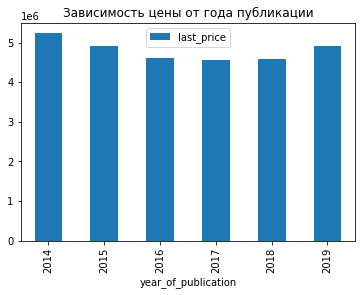

In [118]:
# график зависимости для всего датасета
good_data_year_price = good_data.pivot_table(index='year_of_publication', values='last_price')
good_data_year_price.plot(y='last_price', kind='bar', title='Зависимость цены от года публикации')
plt.show()

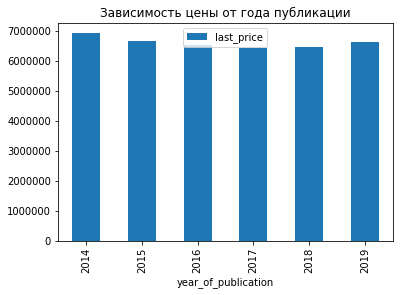

In [110]:
# график зависимости для квартир в центре
good_data_centr_year_price = good_data_centr.pivot_table(index='year_of_publication', values='last_price')
good_data_centr_year_price.plot(y='last_price', kind='bar', title='Зависимость цены от года публикации')
plt.show()

###### Вывод

На обоих графиках (барплот) и для квартир в общем датасете и для квартир в центре прослеживается схожая картина: период с 2014 по 2017 годы характеризуется снижением цены, начиная с 2018 года цена расти. Но имеются различия: на графике для всего датасета это снижение цены более ярко выражено; средняя стоимость квартир в центре по всем годам существенно выше квартир во всем датасете.

## Общий вывод

    В ходе работы выполнены следующие мероприятия и получили результаты:
- предварительно изучены данные;

- проведена предобработка и подготовка данных, включавшая: поиск и удаление по возможности пропусков и других аномалий; приведение данных в столбцах к необходимым типам данных;

- в основной датасет внесены дополнительные столбцы с данными, необходимыми для далбнейшего исследования: цена за квадратный метр; дни, месяцы и годы публикации объявлений; столбец с данными об этажах, разбытых на 3 категории; соотношение жилой и общей площади; соотношение площади кухни и общей площади;

- проведен исследовательский анализ, в ходе которого:
    - изучены основные параметры: площадь, цена, число комнат, высота потолков, время продажи квартир;
    - из основного датасета убраны редкие и выбивающиеся значения из столбцов с ценой, общей площадью, количеством комнат, высотой потолков и расстоянием до центра. В результате очистки данных убраны 12% строк с данными, что считаю приемлимым. Сделан вывод об особой важности корректной очистки данных;
    - изучены факторы больше всего влияющие на стоимость квартиры: площадь квартиры, число комнат, удалённости от центра, этаж, на котором расположена квартира: первом, последнем или другом, а также дата размещения: дня недели, месяца и года. Наибольшее влияние оказывают такие факторы как площадь квартиры (при площади т 30 до 60 кв. м, далее связь существенно ослабевает), число комнат (1-о, 2-х и 3-х комнатные квартиры, при большем количестве комнат связь существенно ослабевает), удаленность от центра (свзь умеренная обратная, чем ближе, тем дороже), этаж (наибольшая стоимость у квартир не на первом и не на последнем этаже, дешевле всего - квартиры, расположенные на первом этаже), год публикации (постепенное снижение стоимости к 2017 году, после этого постепенный рост цены, скорее всего зависит от каких-то внешних факторов, событий);
    - проанализированы 10 населеных пунктов с самым большим числом объявлений. Из них самая высокая цена за квадратный метр в Санкт-Петербурге и состаляет 104 444 руб. и самая низкая цена за квадратный метр в Выборге и состаляет 58 280 руб.
    - проанализирована информация о расстоянии до центра, в результате чего определена граница центральной зоны: и для общей стоимости и для стоимости за квадратный метр определена зона с радиусом 9 км;
    - выделен сегмент квартир, входящих в 9-ти километровую зону от центра (их число составило - 2 896). Изучены парметры для данного сегмента квартир: площадь, цена, число комнат, высота потолков. Изучены факторы, влияющие на стоимость квартиры в центре: число комнат, этаж, удалённость от центра, дата размещения объявления, а также проведено сравнение с влиянием этих факторов на все представенные квартиры:
        - зависимость цены от числа комнат: взаимосвязь у квартир которые находятся в центре более сильная и ярко выраженая, чем у всего датасета;
        - зависимость цены от этажа: для квартир в общем датасете и для квартир в центре схожая взаимосвязь - наибольшая стоимость у квартир не на первом и не на последнем этаже, дешевле всего - квартиры, расположенные на первом этаже. Но для квартир в центре различие в средней цене на квартиры на последнем и на других этажах более размытая, т.е. средняя стоимость квартир, расположенных на всех этажах кроме первого практически одинаковая, для последнего этажа чуть чуть меньше чем для других.Средняя цена для квартир в центре выше, чем для квартир во всем датасете, причем по всем этажам;
        - зависимость цены от удаленности от центра: и для квартир в центре и для квартир во всем датасете одинаковая отрицательноая связь между ценой и удаленностью от центра, чем ближе, тем дороже;
        - зависимость от даты публикации: 1) зависимость от дня публикации и для квартир в центре и для квартир во всем датасете практически отсутствует; 2) зависимость от месяца публикациии для квартир в центре и для квартир во всем датасете присутствует, но она нелинейная более сложная. Цена повышается в начале весны и падает в конце осени; 3) зависимость от года публикациии для квартир в центре и для квартир во всем датасете присутствует: период с 2014 по 2017 годы характеризуется снижением цены, начиная с 2018 года цена расти, но имеются различия: для всего датасета снижение цены более ярко выражено; средняя стоимость квартир в центре по всем годам существенно выше квартир во всем датасете.